In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #стиль графиков


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report
    )


In [7]:
df = pd.read_csv("/Users/kirill/Jupyter/02_projects/Iris_Classification/data/iris_data.csv")
target_names = ['setosa','versicolor','virginica'] #название видов
df["species"] = df["target"].map({i: name for i, name in enumerate(target_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df.info() #общая инфа
df.describe() #статистические характеристики 
df['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] #список признаков для обучения модели
df[feature_cols].head() #проверка

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


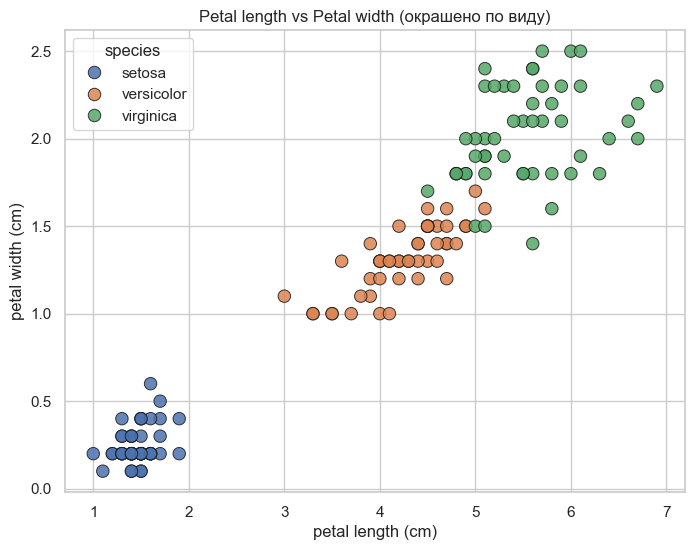

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    s=80,
    edgecolor='k',
    alpha=0.85
)
plt.title("Petal length vs Petal width (окрашено по виду)")
plt.show()

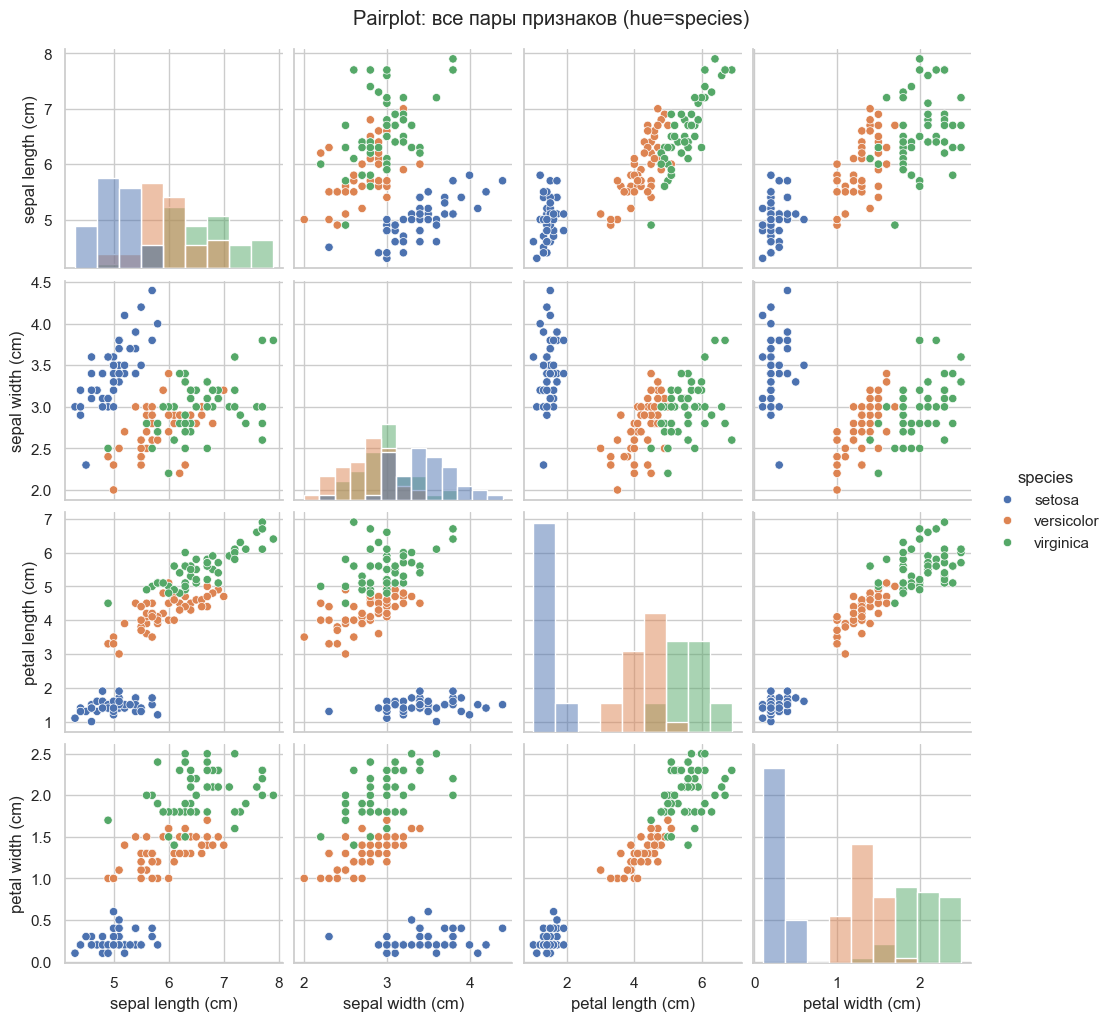

In [11]:
sns.pairplot(df,
            vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
             hue='species',
             diag_kind='hist',
             corner=False) #Если corner=True, строятся только нижние диагональные scatterplots, верхние блоки пропускаются, чтобы не дублировать информацию. У нас corner=False, поэтому строится весь квадрат графиков (все пары признаков).

plt.suptitle("Pairplot: все пары признаков (hue=species)",y=1.02),
plt.show()

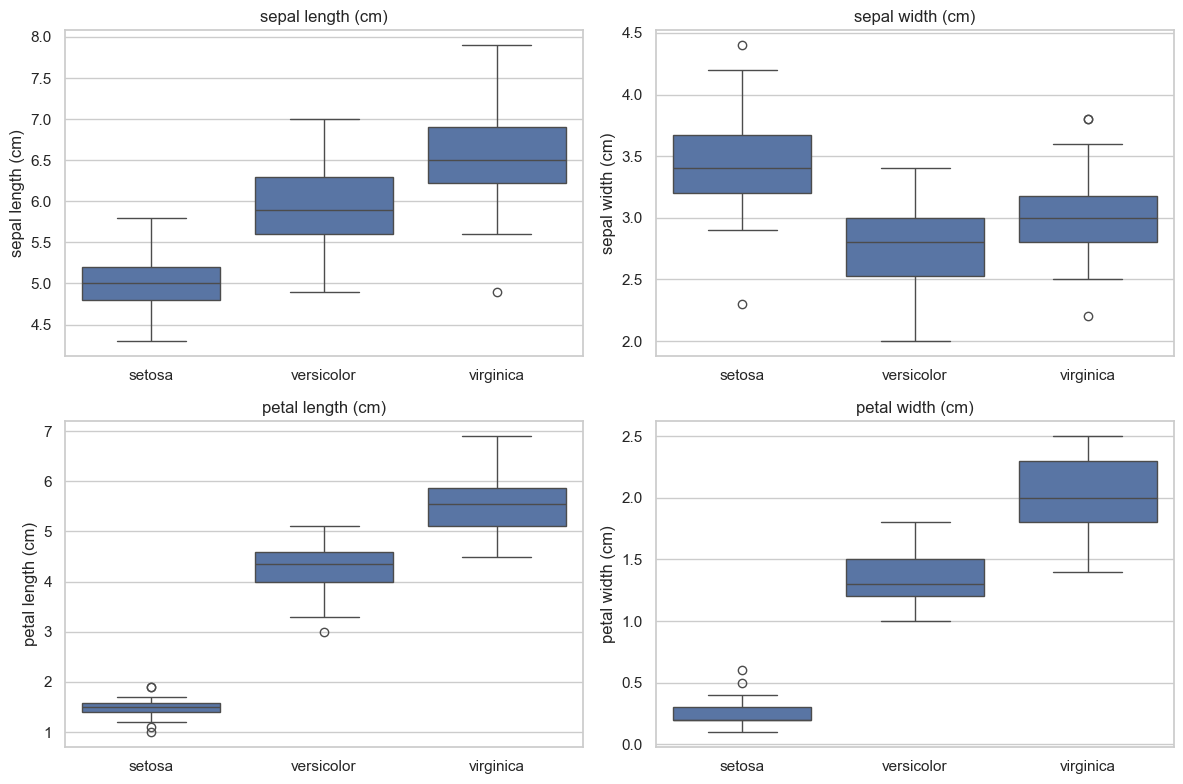

In [12]:
#вызываем две переменные, так как ф-ия вернет два аргумента: fig для глобальных настроек, axes для работы с конкретными графиками
fig, axes = plt.subplots(2, 2, figsize=(12,8)) 
#превращаем axes (по дефолту двумерный массив) в плоский список из 4-х эл-ов
axes = axes.flatten() 
for ax, feat in zip(axes, feature_cols): # zip совмещает два элемента, то есть [(ax1,feat1),(ax2,feat2)]
    sns.boxplot(data=df, x='species',y=feat, ax=ax) # x - разновидности iris, y - текущий признак 
    #для каждого подграфика 
    ax.set_title(feat) 
    #убираем подпись под осью х, чтоб не перегружать графики
    ax.set_xlabel("") 
#чтоб графики не перекрывали друг друга 
plt.tight_layout() 
plt.show()